<a href="https://colab.research.google.com/github/prabhhav/JupyterNotebooks/blob/main/Decision_Tree_Car_Classifier_Car_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/soaicbe/ml/master/car_data/car.data',names=['buying','maint','doors','persons','lug_boot','safety','class'])
data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
class_names = data['class'].unique()
class_names

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [5]:
data.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [6]:
data['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [7]:
data['buying'].value_counts()

high     432
low      432
vhigh    432
med      432
Name: buying, dtype: int64

In [7]:
data['safety'].unique()

array(['low', 'med', 'high'], dtype=object)

In [8]:
data['doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [9]:
data[data['doors'] == '3'].count()

buying      432
maint       432
doors       432
persons     432
lug_boot    432
safety      432
class       432
dtype: int64

In [10]:
data.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,4,4,small,high,unacc
freq,432,432,432,576,576,576,1210


In [11]:
data.dropna()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [13]:
data.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,4,4,small,high,unacc
freq,432,432,432,576,576,576,1210


In [14]:
pd.factorize(data['class'])

(array([0, 0, 0, ..., 0, 3, 2]),
 Index(['unacc', 'acc', 'vgood', 'good'], dtype='object'))

In [15]:
data['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [16]:
data['class'],class_names = pd.factorize(data['class'])

print(class_names)

Index(['unacc', 'acc', 'vgood', 'good'], dtype='object')


In [19]:
data['buying'],_ = pd.factorize(data['buying'])
data['maint'],_ = pd.factorize(data['maint'])
data['doors'],_ = pd.factorize(data['doors'])
data['persons'],_ = pd.factorize(data['persons'])
data['lug_boot'],_ = pd.factorize(data['lug_boot'])
data['safety'],_ = pd.factorize(data['safety'])
data['class'],_ = pd.factorize(data['class'])

In [20]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0


In [21]:
data.corr()

,buying,maint,doors,persons,lug_boot,safety,class
buying,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.286532
maint,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.254656
doors,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.056475
persons,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.336842
lug_boot,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.121453
safety,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.402313
class,0.286532,0.254656,0.056475,0.336842,0.121453,0.402313,1.000000


In [22]:
X = data.drop(['class'], axis='columns')
y = data['class']

In [23]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
from sklearn import tree, metrics
dtree = tree.DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
y_train_pred = dtree.predict(X_train)

accuracy = metrics.accuracy_score(y_train,y_train_pred)
print('Train accuracy: {:.2f}'.format(accuracy))

Train accuracy: 1.00


In [26]:
y_pred = dtree.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print('Test accuracy: {:.2f}'.format(accuracy))

Test accuracy: 0.98


Evaluation Metrics

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
y_hat = dtree.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       363
           1       0.97      0.92      0.95       115
           2       1.00      0.94      0.97        16
           3       0.86      0.96      0.91        25

    accuracy                           0.98       519
   macro avg       0.95      0.95      0.95       519
weighted avg       0.98      0.98      0.98       519



In [28]:
cm = confusion_matrix(y_test, y_hat)
cm

array([[362,   1,   0,   0],
       [  5, 106,   0,   4],
       [  0,   1,  15,   0],
       [  0,   1,   0,  24]])

Text(15.0, 0.5, 'Truth')

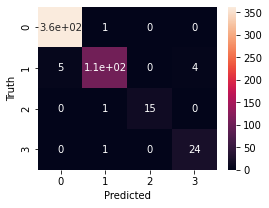

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(4,3))
sn.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [30]:
str(class_names)

"Index(['unacc', 'acc', 'vgood', 'good'], dtype='object')"

GraphViz

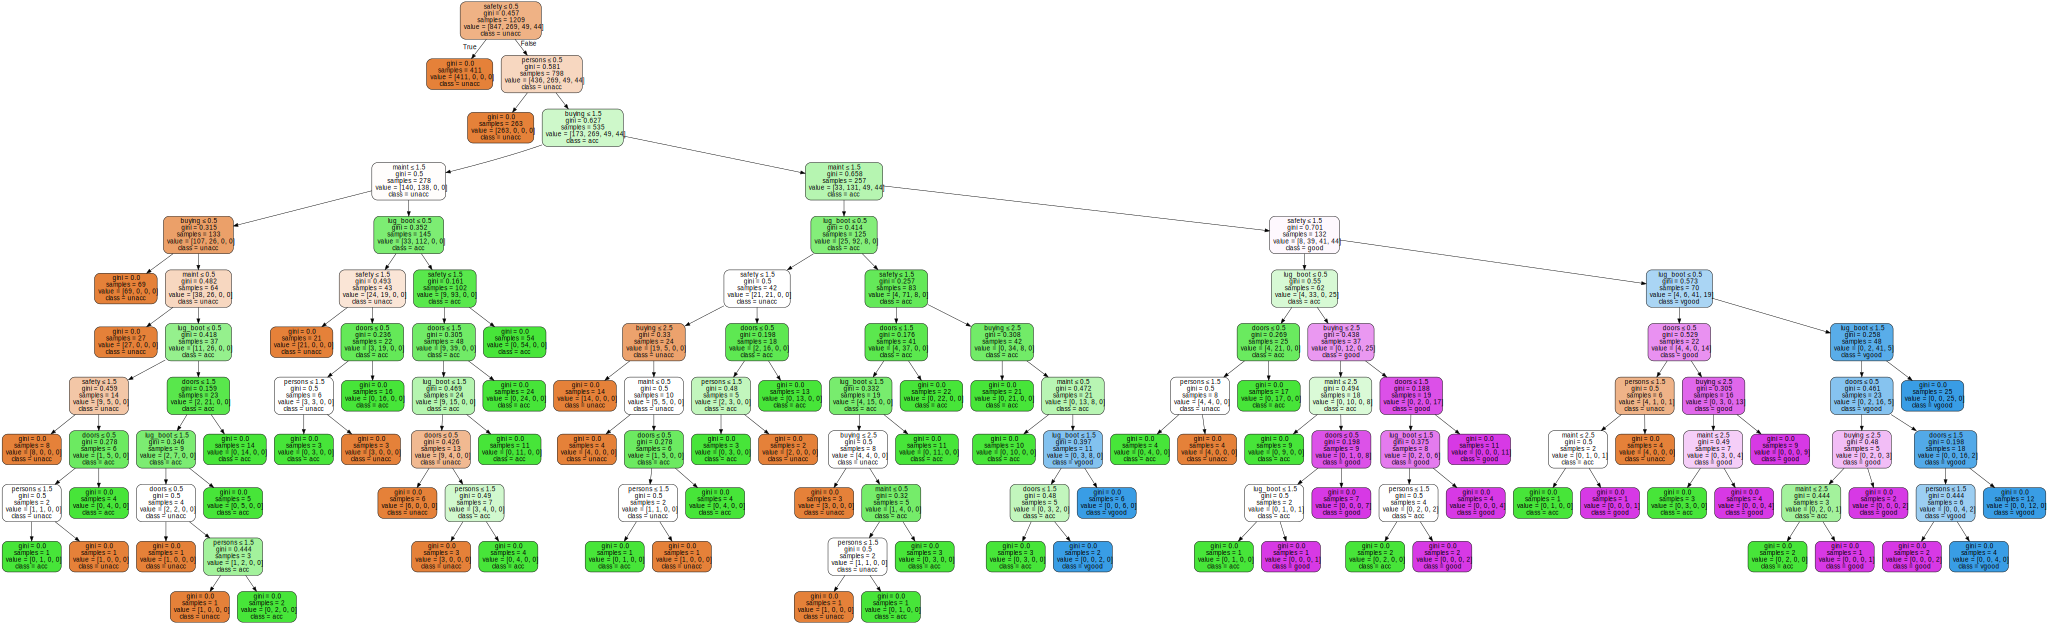

In [31]:
import graphviz
feature_names = X.columns

dot_data = tree.export_graphviz(dtree, out_file=None, filled = True, rounded = True, special_characters=True, feature_names = feature_names, class_names = class_names)
graph = graphviz.Source(dot_data)
graph